In this module we will compute the posterior distribution for an exponential likelihood with a gamma prior using:
* Model Conjugacy
* Numerical Integration
* Metropolis Hastings Algorithm

All of these methods should give the same answer (up to numerical approximation). In practice, one would use the conjugate model result to derive the posterior because this method is computationally fastest. However the  methods of numerical integration and Metropolis Hastings are more general in that they could be used on other, non-conjugate models. Metropolis Hastings is particularly useful because it can be used for problems where the parameter dimension is too high for direct numerical integration. 

## Problem 1

Suppose we observe $X_1,\ldots,X_n \sim f(x|\lambda)$ where $f(x|\lambda)$ is an exponential distribution with rate parameter $\lambda$. Specifically
$$ f(x|\lambda) = \lambda e^{-\lambda x}$$
for $x \geq 0$. We put a $Gamma(\alpha,\beta)$ prior $\pi(\lambda)$ on $\lambda$. This prior has the form
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$
for $\lambda > 0$. Recall that $\alpha$ and $\beta$ are fixed, known constants.

1. Using a few lines of algebra determine that the posterior distribution is $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$.
2. Plot the Gamma prior probability density with $\alpha=3$, $\beta=1/2$ and plot the posterior density assuming $n=10$ and `[0.16265459,0.64434542, 0.00794972, 1.01595712, 1.31977252,0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422]`.


Note: In python, `np.random.exponential`, `np.random.gamma`, `scipy.stats.gamma`, `scipy.stats.expon` use the scale parameterization. We use the rate parameterization. rate = 1/scale. R uses the rate parameterization in `rexp`, `dexp`, etc. and has options for both rate and scale parameterization in `rgamma`, `dgamma`, etc. See [here](https://en.wikipedia.org/wiki/Exponential_distribution) and [here](https://en.wikipedia.org/wiki/Gamma_distribution) for some discussion of different parameterizations.

### Solution:
\begin{align*}
P(\lambda|X) &\propto P(X|\lambda)P(\lambda)\\
&\propto \lambda^{n} e^{-\lambda\sum_i x_i}\lambda^{\alpha-1}e^{-\beta\lambda}\\
&\propto e^{-\lambda(\sum_i x_i + \beta)} \lambda^{n+\alpha-1}
\end{align*}

Thus, posterior distribution $P(\lambda|X) \propto e^{-\lambda(\sum_i x_i + \beta)} \lambda^{n+\alpha-1}$.

Posterior distribution : $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$

In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
alpha = 3
beta = 0.5
n = 10
x = [0.16265459,0.64434542, 0.00794972, 1.01595712, 1.31977252,0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422]

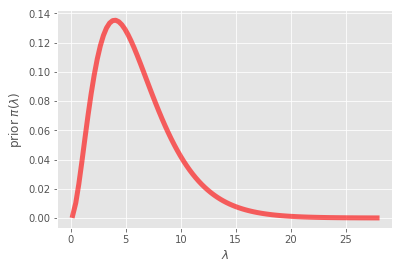

In [3]:
fig, ax = plt.subplots(1, 1)
lamda = np.linspace(gamma.ppf(0.0001, alpha, scale=1/beta), gamma.ppf(0.9999, alpha, scale=1/beta), 100)
ax.plot(lamda, gamma.pdf(lamda, alpha, scale=1/beta), 'r-', lw=5, alpha=0.6, label='gamma prior');
plt.xlabel('$\lambda$');
plt.ylabel(r'prior $\pi(\lambda)$');

In [4]:
sum(x) + beta

5.381450500000001

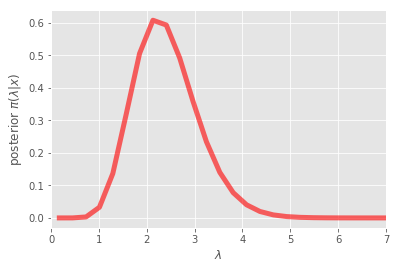

In [5]:
alpha_new = n + alpha
beta_new = sum(x) + beta
fig, ax = plt.subplots(1, 1)
ax.plot(lamda, gamma.pdf(lamda, alpha_new, scale=1/beta_new),'r-', lw=5, alpha=0.6)
ax.set(xlim=(0,7), xlabel=r'$\lambda$', ylabel='posterior $\pi(\lambda|x)$');

## Problem 2

Recall that the posterior is proportional to the likelihood times the prior
$$ \pi(\lambda|x) \propto f(x|\lambda)\pi(\lambda)$$
Here $x=(x_1,\ldots,x_n)$ and $f(x|\lambda) = \lambda^n e^{-\lambda \sum x_i}$ is the joint probability density function. Plot $f(x|\lambda)\pi(\lambda)$ for the $Gamma(\alpha=3,\beta=1/2)$ prior and data from the previous part. Numerically integrate this function and use the result to normalize $f(x|\lambda)\pi(\lambda)$. Verify that the result matches the posterior you found in Problem 1.

### Solution:

$f(x|\lambda)\pi(\lambda)$ for the $Gamma(\alpha=3,\beta=1/2)$ prior

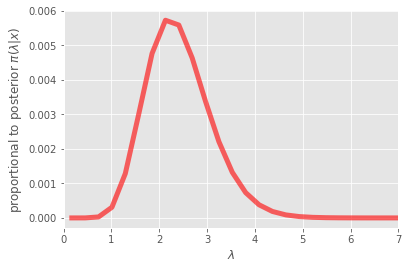

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(lamda, gamma.pdf(lamda, alpha, scale=1/beta)*np.exp(-lamda*sum(x))*np.power(lamda, n),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.set(xlim=(0,7), xlabel=r'$\lambda$', ylabel='proportional to posterior $\pi(\lambda|x)$');

Numerical integration and normalization of $f(x|\lambda)\pi(\lambda)$ :

In [7]:
def posterior_propto(l,al,be):
    return gamma.pdf(l, al, scale=1/be)*np.exp(-l*sum(x))*np.power(l, n)

In [8]:
import scipy.integrate as integrate

In [9]:
mx = integrate.quad(lambda lamda: posterior_propto(lamda, alpha, beta), 
                    gamma.ppf(0.0001, alpha, scale=1/beta), gamma.ppf(0.9999, alpha, scale=1/beta))

In [12]:
mx

(0.009430298353141346, 1.3773787886724223e-09)

In [13]:
mx = mx[0]
mx

0.009430298353141346

In [70]:
def posterior(l,al,be):
    return gamma.pdf(l, al, scale=1/be)*np.exp(-l*sum(x))*np.power(l,n) / mx

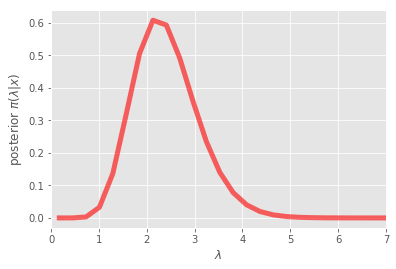

In [71]:
fig, ax = plt.subplots(1, 1)
ax.plot(lamda, posterior(lamda,alpha,beta),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.set(xlim=(0,7), xlabel=r'$\lambda$', ylabel='posterior $\pi(\lambda|x)$');

Comparison of posterior using numerical integration and conjugacy:

In [98]:
plt.rcParams['figure.figsize'] = (15, 5)

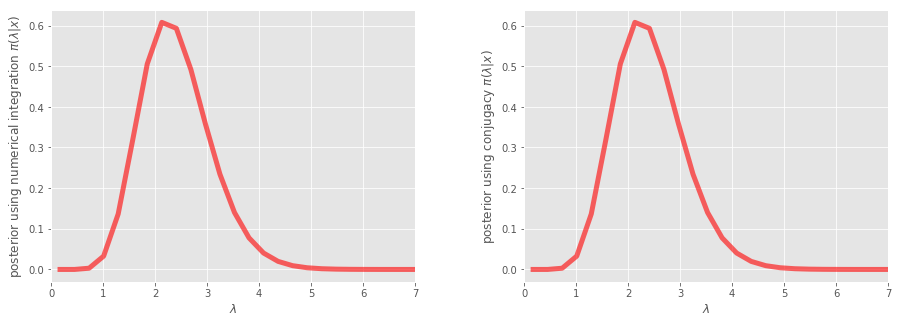

In [109]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.3)

##plot the posterior using numerical integration
ax = fig.add_subplot(1, 2, 1)
ax.plot(lamda, posterior(lamda,alpha,beta),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.set(xlim=(0,7), xlabel=r'$\lambda$', ylabel = 'posterior using numerical integration $\pi(\lambda|x)$');

##plot the posterior using conjugacy
ax = fig.add_subplot(1, 2, 2)
ax.plot(lamda, gamma.pdf(lamda, alpha_new, scale=1/beta_new),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.set(xlim=(0,7), xlabel=r'$\lambda$', ylabel='posterior using conjugacy $\pi(\lambda|x)$');

Therefore, both the results match.  

## Problem 3

Write (or adapt code from class) a Metropolis Hastings algorithm to sample from the posterior. Draw a histogram of the samples and verify that they approximately match the posterior determined using conjugacy or numerical integration. Compute the posterior mean and make a 95% credible interval for $\lambda$ (you can make this interval many ways, but the most popular method is to compute the 0.025 and .975 quantiles of the posterior samples). You can verify that you have the right answer by computing the interval from the conjugacy result in problem 1.

### Solution:

In [109]:
## an simple implementation Metropolis Hastings algorithm
Niter = 50000
chain = np.zeros(Niter)
chain[0] = 0.3

In [110]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.5,size=1)
        if (postp(prop) / postp(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

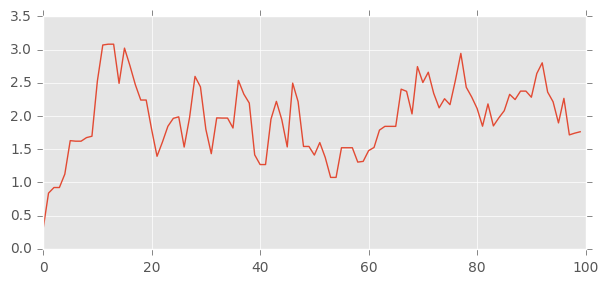

In [111]:
## the chain takes 40+ iterations to converge to a steady state
## usually much longer for more realistic problems
## this is known as burn in
fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(100), chain[:100]);

Looks like chain has converged to steady state after about 20 iterations.

In [112]:
## remove the first 1000 iterations to get rid of burn in
chain = chain[1000:]

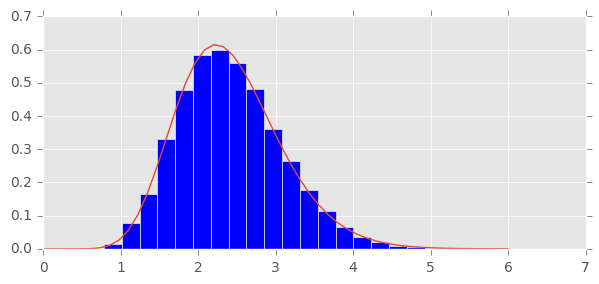

In [113]:
fig = plt.figure()
ax = plt.axes()
ns, bins, rectangles = ax.hist(chain,25,normed=True,color='blue')
p = np.linspace(.5,.85,100);
lmbda = np.linspace(0,6)
plt.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime));

The posterior computed with metropolis looks very similar to the posterior computed using the conjugate result.

In [114]:
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index

The lower bound for a 95% credible interval is

In [115]:
chain_s[ixL]

1.2733665434792834

The upper bound for a 95% credible interval is

In [116]:
chain_s[ixU]

3.8609137816149293

To verify that these are the correct numbers we use the ppf functions

In [117]:
lhs = scipy.stats.gamma.ppf(0.025, a=alphaprime, scale=1/betaprime)
rhs = scipy.stats.gamma.ppf(0.975, a=alphaprime, scale=1/betaprime)
print(lhs)
print(rhs)

1.2862614735196465
3.895155204606947


Posterior mean from conjugacy and Metropolis are very close as well.

In [118]:
np.mean(chain)

2.420231522237631

In [119]:
alphaprime / betaprime

2.415705565371559